In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_data.flow_from_directory(r"D:\Assignment 3\dataset\training",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_data.flow_from_directory(r"D:\Assignment 3\dataset\testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3453 images belonging to 5 classes.
Found 864 images belonging to 5 classes.


In [6]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(3,3)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))


In [12]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)

C:\Users\VINISHA\AppData\Local\Temp\ipykernel_15696\1932184935.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)


Epoch 1/30
108/108 [==============================] - 20s 154ms/step - loss: 1.2909 - accuracy: 0.4596 - val_loss: 1.3326 - val_accuracy: 0.4606
Epoch 2/30
108/108 [==============================] - 14s 127ms/step - loss: 1.1291 - accuracy: 0.5372 - val_loss: 1.1166 - val_accuracy: 0.5903
Epoch 3/30
108/108 [==============================] - 14s 129ms/step - loss: 1.0583 - accuracy: 0.5815 - val_loss: 1.2399 - val_accuracy: 0.5370
Epoch 4/30
108/108 [==============================] - 14s 131ms/step - loss: 1.0218 - accuracy: 0.6082 - val_loss: 1.4827 - val_accuracy: 0.5428
Epoch 5/30
108/108 [==============================] - 14s 128ms/step - loss: 1.0167 - accuracy: 0.6102 - val_loss: 1.1632 - val_accuracy: 0.6042
Epoch 6/30
108/108 [==============================] - 14s 127ms/step - loss: 0.9515 - accuracy: 0.6316 - val_loss: 1.1341 - val_accuracy: 0.6065
Epoch 7/30
108/108 [==============================] - 14s 128ms/step - loss: 0.9282 - accuracy: 0.6423 - val_loss: 1.1126 - val_ac

In [14]:
model.save("flower.h5")

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
import numpy as np

In [17]:
model=load_model("flower.h5")

In [31]:
img=image.load_img("daisy 1.jpg",target_size=(64,64))

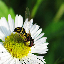

In [32]:
img

In [21]:
type(img)

PIL.Image.Image

In [22]:
x=image.img_to_array(img)

In [23]:
x

array([[[26., 38., 52.],
        [28., 40., 54.],
        [27., 39., 53.],
        ...,
        [19., 28., 45.],
        [19., 26., 44.],
        [18., 25., 43.]],

       [[27., 39., 53.],
        [28., 40., 54.],
        [26., 38., 52.],
        ...,
        [19., 28., 45.],
        [16., 23., 41.],
        [17., 24., 42.]],

       [[27., 39., 53.],
        [28., 40., 54.],
        [28., 40., 54.],
        ...,
        [19., 28., 45.],
        [20., 27., 45.],
        [16., 23., 41.]],

       ...,

       [[12., 17., 36.],
        [12., 17., 36.],
        [13., 18., 37.],
        ...,
        [11., 16., 35.],
        [11., 16., 35.],
        [11., 16., 35.]],

       [[13., 18., 37.],
        [12., 17., 36.],
        [13., 18., 37.],
        ...,
        [ 9., 14., 33.],
        [10., 15., 34.],
        [10., 15., 34.]],

       [[13., 18., 37.],
        [13., 18., 37.],
        [14., 19., 38.],
        ...,
        [10., 15., 34.],
        [10., 15., 34.],
        [ 9., 14., 33.]]

In [24]:
x.shape

(64, 64, 3)

In [25]:
x=np.expand_dims(x,axis=0)

In [26]:
pred_prob=model.predict(x)

1/1 [==============================] - 3s 3s/step


In [27]:
pred_prob

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [28]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id=pred_prob.argmax(axis=1)[0]

In [30]:
pred_id

0

In [34]:
print("Predicted flower ",str(class_name[pred_id]))

Predicted flower  Daisy
